#### завантаження даних; очищення від пропусків; нормалізацію ознак (StandardScaler або MinMaxScaler); поділ на train/test (наприклад, 80/20).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, utils

In [2]:
df_kaggle = pd.read_csv("train.csv")
df_kaggle = df_kaggle.dropna()
df_kaggle = df_kaggle.astype(float)
X = df_kaggle[["x"]]
y = df_kaggle["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_kaggle.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
from sklearn.datasets import make_classification
X, y = make_classification(
   n_samples=1000,      
   n_features=10,      
   n_informative=7,    
   n_redundant=2,       
   n_classes=2,       
   random_state=42
)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["target"] = y
df.head()

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
df.head() 


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-1.147202,-1.670851,1.371919,1.267551,0.764752,0.573700,-1.598491,-0.557015,4.353265,-0.963871,0
1,-1.191387,-2.285686,1.320717,2.227457,-0.609110,1.084255,-4.219594,0.758810,-1.429300,0.369956,0
2,-3.897259,-3.413537,10.155710,-1.069622,4.479522,-2.298346,-2.610669,-1.311350,-1.198817,0.062056,1
3,-0.685142,3.243428,-5.077643,-0.016700,-1.558793,-0.045471,-0.531895,-1.099699,0.656782,1.604889,0
4,-2.423254,-0.430341,0.323621,-0.774068,0.124669,-0.408451,-2.544363,-1.762523,-0.556955,2.943371,0


#### Побудова нейронної мережі та компіляція

In [3]:
model = models.Sequential([
   layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
   layers.Dense(32, activation='relu'),
   layers.Dense(1)  # для регресії
])
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\polina\yniver\Kubiedinova_Data_Analysis\myenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
num_classes = 1  # бінарна класифікація
model = models.Sequential([
layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

#layers.Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
layers.Dense(32, activation='relu'),
layers.Dropout(0.2),
layers.Dense(num_classes, activation='sigmoid')
])
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\polina\yniver\Kubiedinova_Data_Analysis\myenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

#### Навчання та оцінка моделі

In [4]:
es = callbacks.EarlyStopping(
   monitor='val_loss',
   patience=10,
   restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[es], verbose=2)

mse, mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test).reshape(-1)

print(f"Regression test MSE: {mse:.4f}, MAE: {mae:.4f}")

Epoch 1/200
14/14 - 2s - 110ms/step - loss: 2309.9255 - mae: 41.8988 - val_loss: 1276.0176 - val_mae: 30.5492
Epoch 2/200
14/14 - 0s - 10ms/step - loss: 971.4462 - mae: 26.9942 - val_loss: 464.6683 - val_mae: 18.4229
Epoch 3/200
14/14 - 0s - 10ms/step - loss: 287.3107 - mae: 14.2470 - val_loss: 76.8092 - val_mae: 7.4824
Epoch 4/200
14/14 - 0s - 24ms/step - loss: 29.4501 - mae: 4.1295 - val_loss: 7.3211 - val_mae: 2.1086
Epoch 5/200
14/14 - 0s - 10ms/step - loss: 12.5053 - mae: 2.8715 - val_loss: 11.5387 - val_mae: 2.7506
Epoch 6/200
14/14 - 0s - 10ms/step - loss: 11.0470 - mae: 2.7022 - val_loss: 7.2765 - val_mae: 2.0997
Epoch 7/200
14/14 - 0s - 10ms/step - loss: 8.3745 - mae: 2.3264 - val_loss: 7.6093 - val_mae: 2.1664
Epoch 8/200
14/14 - 0s - 14ms/step - loss: 8.3048 - mae: 2.2916 - val_loss: 7.2965 - val_mae: 2.1119
Epoch 9/200
14/14 - 0s - 20ms/step - loss: 8.1432 - mae: 2.2745 - val_loss: 7.1549 - val_mae: 2.0846
Epoch 10/200
14/14 - 0s - 25ms/step - loss: 8.1391 - mae: 2.2807 - v

In [8]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_s, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[es], verbose=2)

loss, acc = model.evaluate(X_test_s, y_test, verbose=0)
history.history['loss']
print(f"Classification test loss: {loss:.4f}, accuracy: {acc:.4f}")

Epoch 1/200
20/20 - 2s - 82ms/step - accuracy: 0.6172 - loss: 0.6633 - val_accuracy: 0.8438 - val_loss: 0.5877
Epoch 2/200
20/20 - 0s - 7ms/step - accuracy: 0.8219 - loss: 0.5408 - val_accuracy: 0.8625 - val_loss: 0.4837
Epoch 3/200
20/20 - 0s - 7ms/step - accuracy: 0.8406 - loss: 0.4541 - val_accuracy: 0.8625 - val_loss: 0.4074
Epoch 4/200
20/20 - 0s - 7ms/step - accuracy: 0.8484 - loss: 0.3884 - val_accuracy: 0.8687 - val_loss: 0.3521
Epoch 5/200
20/20 - 0s - 7ms/step - accuracy: 0.8609 - loss: 0.3525 - val_accuracy: 0.8813 - val_loss: 0.3159
Epoch 6/200
20/20 - 0s - 7ms/step - accuracy: 0.8641 - loss: 0.3194 - val_accuracy: 0.8875 - val_loss: 0.2913
Epoch 7/200
20/20 - 0s - 7ms/step - accuracy: 0.8891 - loss: 0.2902 - val_accuracy: 0.8875 - val_loss: 0.2741
Epoch 8/200
20/20 - 0s - 7ms/step - accuracy: 0.8906 - loss: 0.2739 - val_accuracy: 0.9000 - val_loss: 0.2602
Epoch 9/200
20/20 - 0s - 7ms/step - accuracy: 0.8938 - loss: 0.2583 - val_accuracy: 0.8813 - val_loss: 0.2456
Epoch 10/

#### Візуалізація моделі

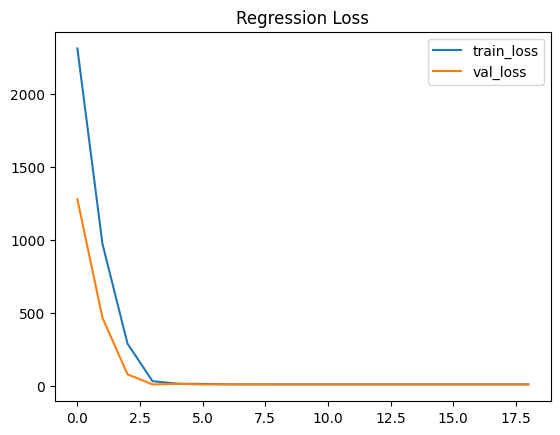

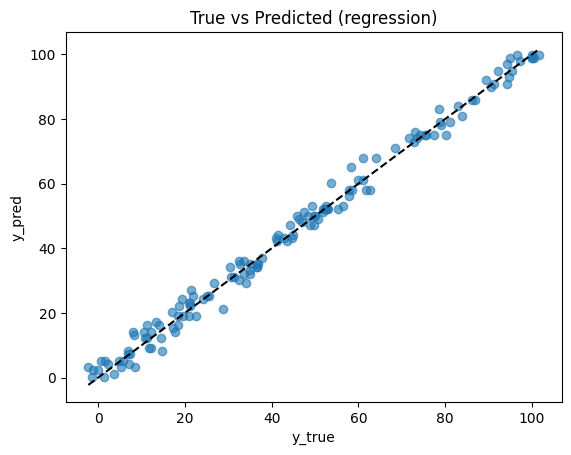

In [5]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Regression Loss')
plt.legend()
plt.show()


plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('True vs Predicted (regression)')
plt.show()

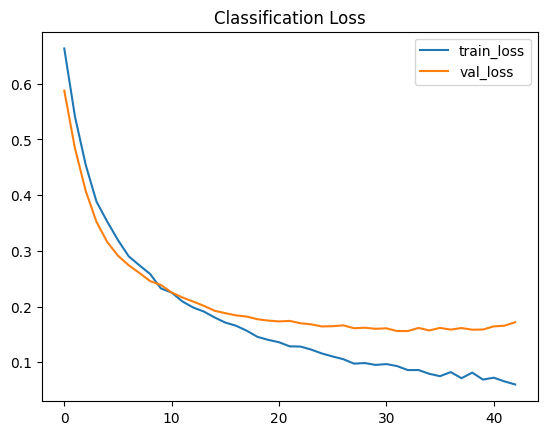

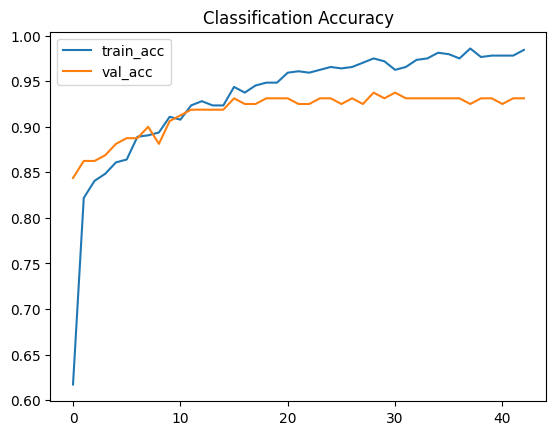

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.88198304 0.14461534 0.04649603 0.02300323 0.9988498  0.9694521
 0.99763954 0.99981815 0.12412734 0.06915246]
Confusion matrix:
 [[94  6]
 [ 5 95]]


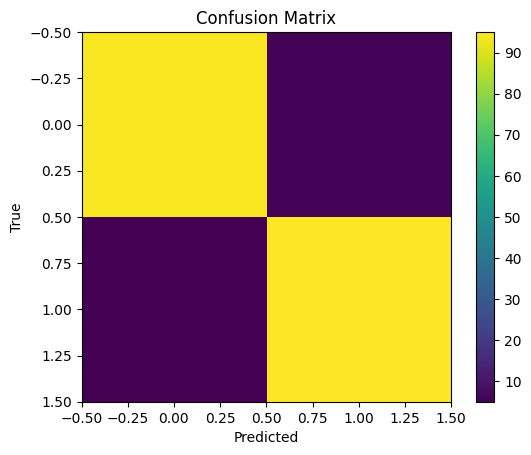

AUC = 0.9855


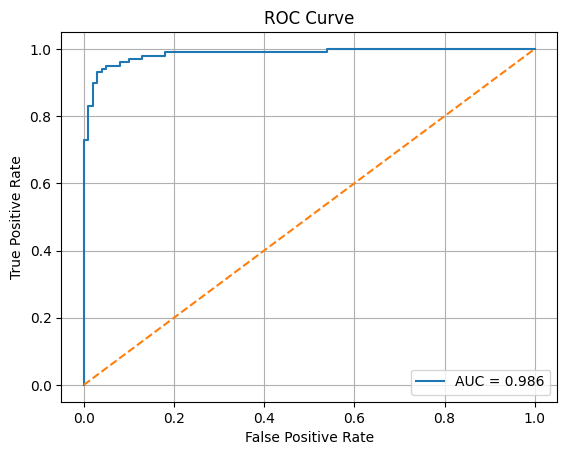

In [9]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Classification Loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Classification Accuracy')
plt.legend()
plt.show()

import seaborn as sns

y_pred_prob = model.predict(X_test_s).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)
print(y_pred_prob[:10])
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC = {roc_auc:.4f}")

# Побудова ROC
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')   # лінія випадкового класифікатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()